In [209]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

In [210]:
url = ("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv")
df = pd.read_csv(url)

In [211]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [212]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [214]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

<Axes: xlabel='Attrition', ylabel='Last Raise Percentage'>

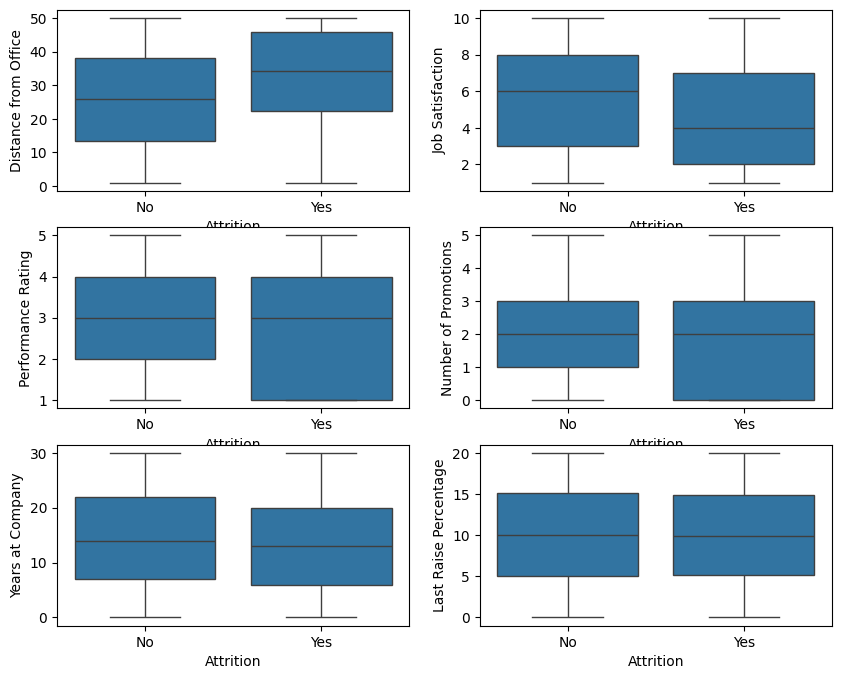

In [215]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2, figsize=(10,8))

sns.boxplot(x='Attrition', y='Distance from Office', data=df, ax=ax1)
sns.boxplot(x='Attrition', y='Job Satisfaction', data=df, ax=ax2)
sns.boxplot(x='Attrition', y='Performance Rating', data=df, ax=ax3)
sns.boxplot(x='Attrition', y='Number of Promotions', data=df, ax=ax4)
sns.boxplot(x='Attrition', y='Years at Company', data=df, ax=ax5)
sns.boxplot(x='Attrition', y='Last Raise Percentage', data=df,ax=ax6)

<Axes: xlabel='Attrition', ylabel='Monthly Income'>

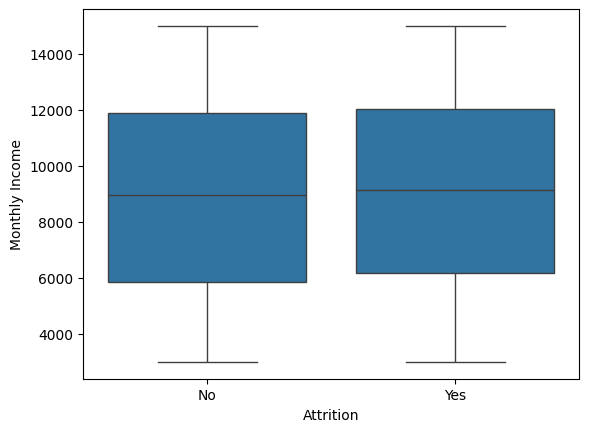

In [216]:
sns.boxplot(x='Attrition', y='Monthly Income', data=df)

<Axes: xlabel='Department', ylabel='count'>

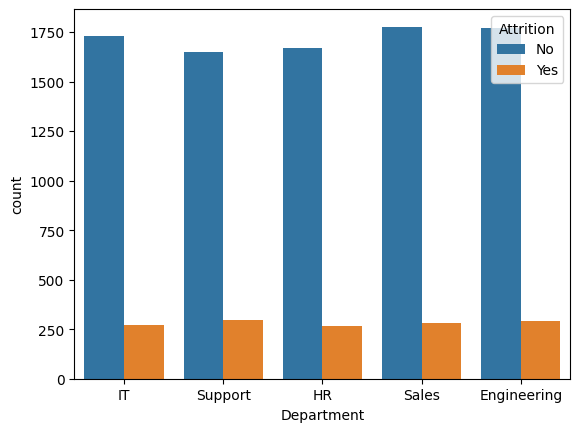

In [217]:
sns.countplot(x=df['Department'], hue=df['Attrition'])


<Axes: xlabel='Attrition'>

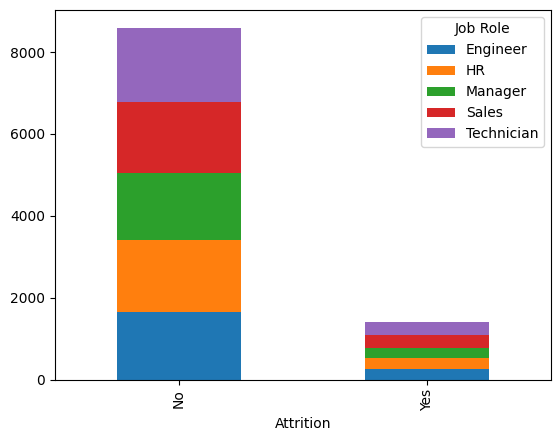

In [218]:
df.groupby(['Attrition','Job Role'])['Job Role'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Department', ylabel='count'>

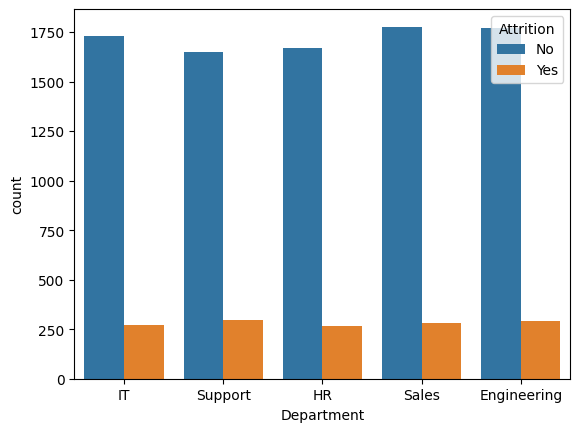

In [219]:
sns.countplot(x=df['Department'], hue=df['Attrition'])

<Axes: xlabel='Job Role', ylabel='count'>

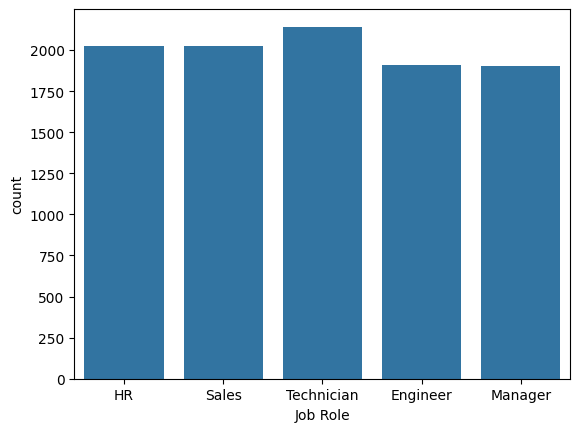

In [220]:
sns.countplot(x=df['Job Role'])

hypothesis: 
1. Higher monthly income and performance ratings might be associated with lower attrition rates.
2. Employees with lower job satisfaction, fewer promotions, and higher distance from the office are more likely to leave the company.

feature engineering

In [221]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [222]:
df['output'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

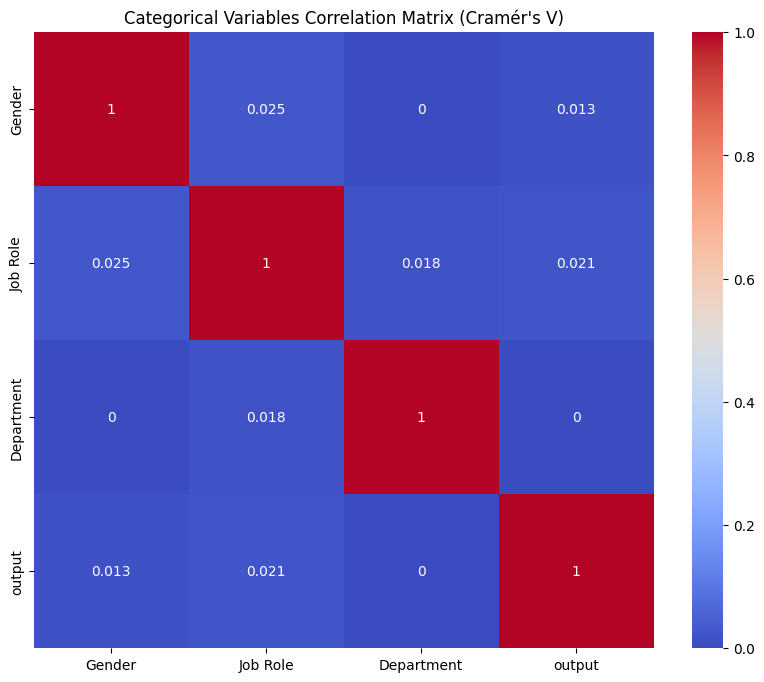

In [223]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(confusion_matrix):
    """Calculate Cramér's V for the given confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Get total number of observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the categorical variables that you want to analyze
categorical_cols = ['Gender', 'Job Role', 'Department','output',]

# Clean data to remove missing values
clean_df = df.dropna(subset=categorical_cols)

# Clean data to remove missing values
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the data type to floating-point
corr_matrix = corr_matrix.astype(float)

# Visual correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Categorical Variables Correlation Matrix (Cramér\'s V)')
plt.show()

In [224]:
df = df.drop(columns=['Employee ID', 'Age', 'Gender', 'Job Role','Department','Attrition','Last Raise Percentage'])

In [225]:
#df['Promotion Rate'] = df['Number of Promotions'] / df['Years at Company']
#df

In [226]:
# Scale numerical features

numerical_features = ['Age', 'Monthly Income', 'Last Raise Percentage', 'Distance from Office']
model_data[numerical_features] = MinMaxScaler().fit_transform(model_data[numerical_features])

model_data

NameError: name 'MinMaxScaler' is not defined

<Axes: >

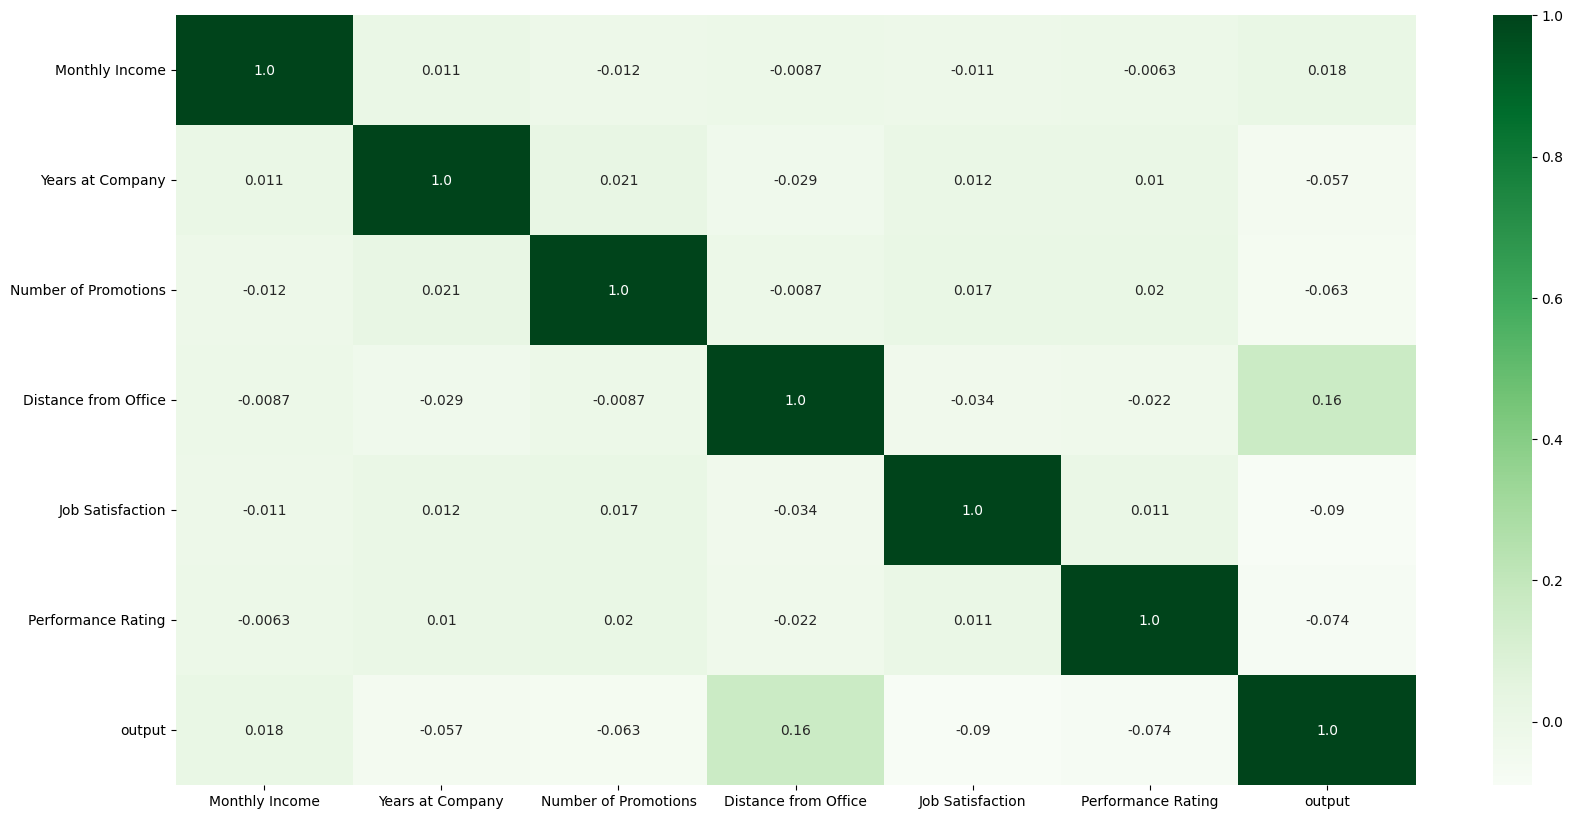

In [227]:
# visual representation of how numerical features are related to each other

cor= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

In [228]:
df.isna().sum()

Monthly Income          0
Years at Company        0
Number of Promotions    0
Distance from Office    0
Job Satisfaction        0
Performance Rating      0
output                  0
dtype: int64

In [229]:
#model_data['Promotion Rate'] = model_data['Promotion Rate'].fillna(0)

In [230]:
model_data.isna().sum()

NameError: name 'model_data' is not defined

In [231]:
#model_data.describe()

Modeling

In [232]:
df['output'].value_counts()/len(df)

output
0    0.8597
1    0.1403
Name: count, dtype: float64

In [233]:
df.columns

Index(['Monthly Income', 'Years at Company', 'Number of Promotions',
       'Distance from Office', 'Job Satisfaction', 'Performance Rating',
       'output'],
      dtype='object')

In [234]:
X = df.drop(columns=['output'])
y=df['output']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [236]:
from sklearn.svm import SVC

In [237]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
svc=SVC(kernel='rbf')

In [238]:
knn_scores = cross_val_score(knn, X_train, y_train, scoring= 'f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
svc_scores = cross_val_score(svc,X_train, y_train, scoring='f1', cv=5)
dt_scores = cross_val_score(dt,X_train, y_train, scoring='f1_weighted', cv=5)


print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'NB Classifier Mean F1 Score: {np.mean(nb_scores)}')
print(f'SVC Classifier Mean F1 Score: {np.mean(svc_scores)}')
print(f'DT Classifier Mean F1 Score: {np.mean(dt_scores)}')

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression Mean F1 Score: 0.01986032915656715
K-Nearest Neighbors Mean F1 Score: 0.06107341233819604
NB Classifier Mean F1 Score: 0.004081632653061224
SVC Classifier Mean F1 Score: 0.0
DT Classifier Mean F1 Score: 0.7767350252392003


In [239]:
#building an actual model
KNN = knn.fit(X_train, y_train)
LOG = logreg.fit(X_train, y_train)
#NB = nb.fit(X_train, y_train)
DT = dt.fit(X_train, y_train)

#prediction y
y_pred_log = LOG.predict(X_test)
y_proba_log = LOG.predict_proba(X_test)[:, 1]

y_pred_knn=KNN.predict(X_test)
y_proba_knn = KNN.predict_proba(X_test)[:, 1]

#y_pred_nb = NB.predict(X_test)
#y_proba_nb = NB.predict_proba(X_test)[:, 1]

y_pred_dt = DT.predict(X_test)
y_proba_dt = DT.predict_proba(X_test)[:,1]

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
# Logreg score
print(accuracy_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_log,average='weighted'))
print(f1_score(y_test, y_pred_log,average='weighted'))
print(recall_score(y_test, y_pred_log,average='weighted'))

0.8556666666666667
0.8013239530988274
0.7937627233359561
0.8556666666666667


In [241]:
#KNN score
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn,average='weighted'))
print(f1_score(y_test, y_pred_knn,average='weighted'))
print(recall_score(y_test, y_pred_knn,average='weighted'))

0.8346666666666667
0.753547766323024
0.7856667547934685
0.8346666666666667


In [242]:
#nb score
#print(accuracy_score(y_test, y_pred_nb))
#print(precision_score(y_test, y_pred_nb,average='weighted'))
#print(f1_score(y_test, y_pred_nb,average='weighted'))
#print(recall_score(y_test, y_pred_nb,average='weighted'))

In [243]:
#dt score
print(accuracy_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt,average='weighted'))
print(f1_score(y_test, y_pred_dt,average='weighted'))
print(recall_score(y_test, y_pred_dt,average='weighted'))

0.768
0.7741176309483053
0.7710053902960624
0.768


Logistic Regression ROC-AUC Score: 0.6351850049036576
KNN ROC-AUC Score: 0.5532335294796353
NB ROC-AUC Score: 0.5429430598823123


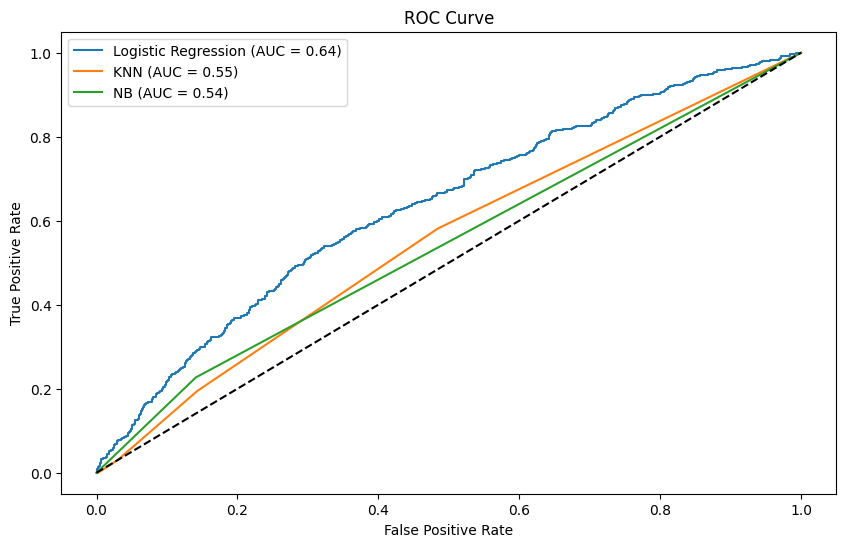

In [244]:
#Compute ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, y_proba_log)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
#roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Logistic Regression ROC-AUC Score:", roc_auc_log)
print("KNN ROC-AUC Score:", roc_auc_knn)
print("NB ROC-AUC Score:", roc_auc_dt)

# Step 3: Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'NB (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ROC AUC: 0.7491717794108792


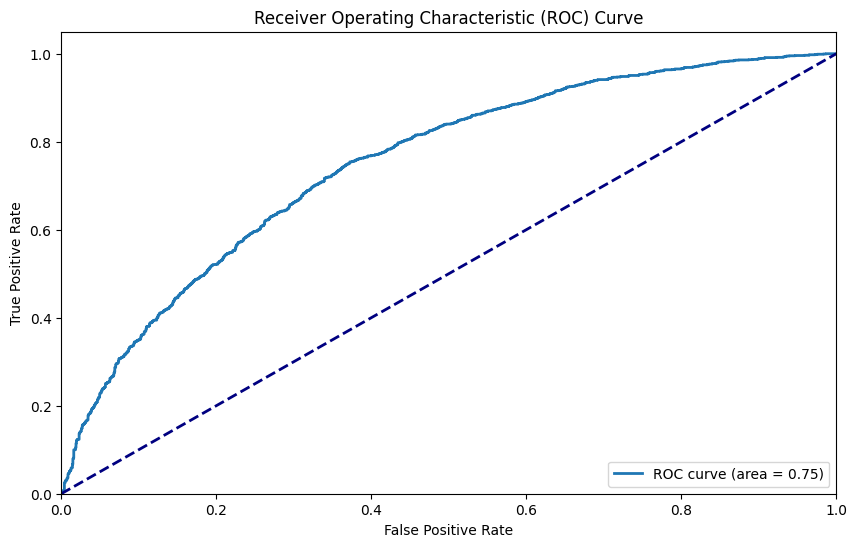

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1738
           1       0.68      0.70      0.69      1701

    accuracy                           0.69      3439
   macro avg       0.69      0.69      0.69      3439
weighted avg       0.69      0.69      0.69      3439



In [245]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Train the best logistic regression model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = best_model.predict(X_test)
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]


# Evaluate the model on test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Plot ROC curves for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report for the test set
print("Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

In [249]:
#Step 4: Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_logistic)

TypeError: 'DataFrame' object is not callable

In [ ]:
cm = confusion_matrix(y_test, pred_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [247]:
sns.heatmap(confusion_matrix(y_test, y_proba_log), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')

TypeError: 'DataFrame' object is not callable

In [ ]:
#logistic
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Define the parameter grid for dt
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid=param_grid, scoring='f1', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_log = grid_search.best_estimator_

In [ ]:
print(f'Best Neighbors parameters: {grid_search.best_params_}')

In [ ]:
y_pred_log1 = best_log.predict(X_test)
y_pred_prob_knn1 = best_log.predict_proba(X_test)[:, 1]

In [ ]:
a=accuracy_score(y_test, y_pred_log1)
b=precision_score(y_test, y_pred_log1,average='weighted')
d=f1_score(y_test, y_pred_log1,average='weighted')
c=recall_score(y_test, y_pred_log1,average='weighted')

print(a,b,d,c)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn.csv')

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distribution of churn
sns.countplot(x='Churn', data=df)
plt.show()

# Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Hypothesis: Customers with lower tenure, fewer products, and lower balance are more likely to churn.


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'Balance', 'EstimatedSalary']])

# Split data into features and target variable
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation function
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate all models
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model)
    print(f'{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


from sklearn.model_selection import GridSearchCV

# Assuming Logistic Regression performed the best
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Final model
best_model = grid_search.best_estimator_

# Evaluate final model
accuracy, precision, recall, f1 = evaluate_model(best_model)
print(f'Optimized Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


In [ ]:
#side note on how to do pipline

# Splitting the data into features and target variable
X = data.drop(columns=['MadePurchase'])
y = data['MadePurchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency']
categorical_cols = ['Gender', 'ProductCategory']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and combine preprocessing and modeling steps into a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the pipeline
clf.fit(X_train, y_train)